In [2]:
import pandas as pd 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [36]:
from matplotlib.pyplot import * 

print(colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted

In [4]:
data = pd.read_csv("Heart Attack.csv")
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [8]:
data['gender'].unique()

array([1, 0])

In [9]:
mapping_data = {"negative":0 , "positive":1}
data["Sick"]=data["class"].map(mapping_data)
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,Sick
0,64,1,66,160,83,160.0,1.80,0.012,negative,0
1,21,1,94,98,46,296.0,6.75,1.060,positive,1
2,55,1,64,160,77,270.0,1.99,0.003,negative,0
3,64,1,70,120,55,270.0,13.87,0.122,positive,1
4,55,1,64,112,65,300.0,1.08,0.003,negative,0
...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative,0
1315,66,1,84,125,55,149.0,1.33,0.172,positive,1
1316,45,1,85,168,104,96.0,1.24,4.250,positive,1
1317,54,1,58,117,68,443.0,5.80,0.359,positive,1


In [10]:
data.drop("class",inplace=True,axis=1)
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,Sick
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


<Axes: >

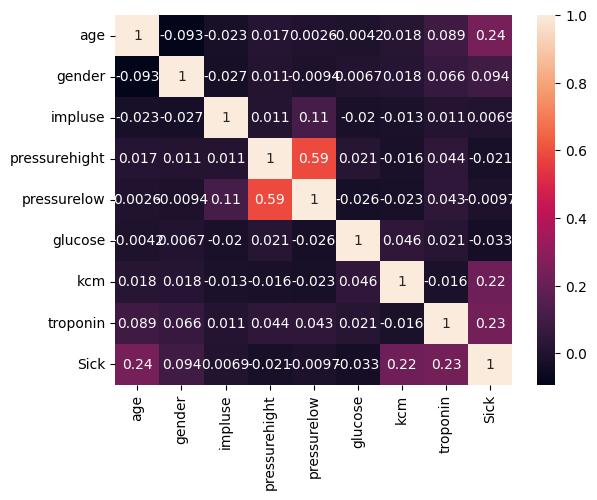

In [11]:
corr = data.corr()
sns.heatmap(corr,annot=True)

In [12]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [13]:
x_train , x_test , y_train , y_test = train_test_split(x,y,shuffle=False,test_size=0.2,random_state=0)

In [14]:
mms = StandardScaler()

mms_X_train = mms.fit_transform(x_train)
mms_x_test = mms.transform(x_test)

In [15]:
classifier = RandomForestClassifier(n_estimators=100,random_state=0)

In [16]:
classifier.fit(mms_X_train,y_train)

RandomForestClassifier(random_state=0)

In [17]:
y_predict = classifier.predict(mms_x_test)

In [18]:
accuracy = accuracy_score(y_test,y_predict)
accuracy*100

99.62121212121212

In [28]:
classifier.score(mms_X_train,y_train)
classifier.score(mms_x_test,y_test)

0.9962121212121212

In [20]:
test = pd.DataFrame({"age":[64],"gender":[1],"impluse":[66],"pressurehight":[160],"pressurelow":[83],"glucose":[160.0],"kcm":[1.80],"troponin":[0.012]})
classifier.predict(test)

c:\Users\Computec\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1])

In [29]:
acc = confusion_matrix(y_test,y_predict)


array([[ 98,   0],
       [  1, 165]])

<Axes: >

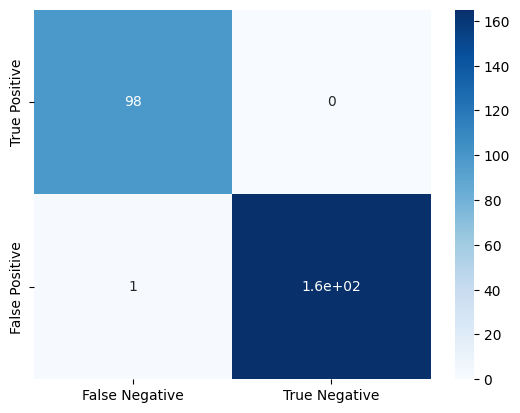

In [37]:
sns.heatmap(acc,xticklabels=["False Negative","True Negative"],yticklabels=["True Positive","False Positive"],annot=True,cmap="Blues")